<a href="https://colab.research.google.com/github/prakharscse18/FakeNews/blob/main/Fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                               title  \
0  Will Stabler return to 'Law and Order: SVU' fo...   
1  Travis Barker Survives ‘Really Bad’ Crash with...   
2  Iggy Azalea's Revenge on Nick Young: I Burned ...   
3  We have reason to believe a new Justin Timberl...   
4  23 Times Blake Lively And Ryan Reynolds Trolle...   

                                            news_url            source_domain  \
0  http://www.today.com/popculture/will-stabler-r...            www.today.com   
1  http://extratv.com/2018/07/16/travis-barker-su...              extratv.com   
2  https://www.nbclosangeles.com/entertainment/en...    www.nbclosangeles.com   
3  https://www.businessinsider.com/new-justin-tim...  www.businessinsider.com   
4  https://www.thethings.com/23-times-blake-livel...        www.thethings.com   

   tweet_num  label                                               text  
0         62      1  Will Stabler return to 'Law and Order: SVU' fo...  
1         46      1  Travis Ba

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7649 - loss: 0.5581 - val_accuracy: 0.7904 - val_loss: 0.4606
Epoch 2/4
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8803 - loss: 0.2912 - val_accuracy: 0.7826 - val_loss: 0.5247
Epoch 3/4
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9534 - loss: 0.1323 - val_accuracy: 0.7734 - val_loss: 0.6263
Epoch 4/4
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.7760 - val_loss: 0.8903


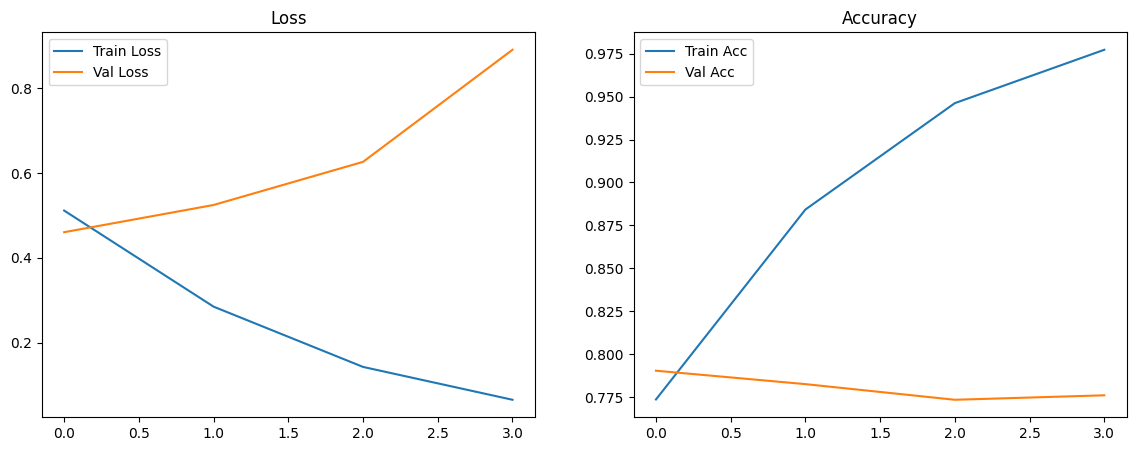

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.6812    0.4870    0.5680       386
           1     0.8505    0.9275    0.8873      1214

    accuracy                         0.8213      1600
   macro avg     0.7658    0.7073    0.7276      1600
weighted avg     0.8096    0.8213    0.8103      1600

ROC-AUC: 0.8109


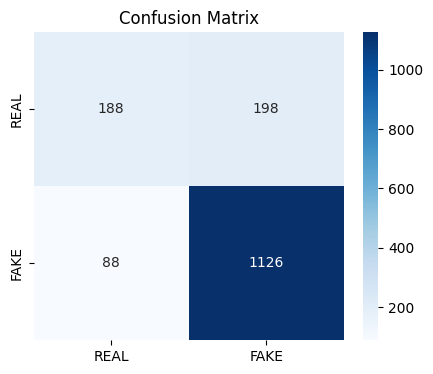

Saved model to /content/fake_news_model.keras and tokenizer to /content/tokenizer.joblib

=== MODEL SUMMARY ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 40, 64)           │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 128)              │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 32)               │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,629 (15.45 MB)

 Trainable params: 1,350,209 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,700,420 (10.30 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


,title,url,label,prob
0,"Climate change could fuel drug use, health wat...",https://ca.news.yahoo.com/climate-change-could...,FAKE,0.999940
1,"Pakistan, Jordan vow to expand military ties",https://tribune.com.pk/story/2577824/pakistan-...,FAKE,0.991666
2,Tariffs are coming for your holiday wine,https://abc7.com/post/tariffs-are-coming-holid...,FAKE,0.677386
3,The key to unlocking private climate finance,https://www.gulf-times.com/article/715165/opin...,FAKE,0.990447
4,The Dead Sea: A Surprising Tourist Ranking,https://www.travelandtourworld.com/news/articl...,FAKE,0.992392


In [1]:
!pip install -q tensorflow pandas matplotlib seaborn requests beautifulsoup4 joblib

import re, json, requests, numpy as np, pandas as pd, joblib
import matplotlib.pyplot as plt, seaborn as sns
from bs4 import BeautifulSoup
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models

# -------------------------
# 0) SETTINGS / API KEY
# -------------------------
CSV_PATH = "/content/FakeNewsNet.csv"
API_KEY = "pub_0e014914d5b6471096f373df256f2584"
MAX_SAMPLES = 8000
MAX_WORDS = 20000
MAX_LEN = 40
EPOCHS = 4
BATCH_SIZE = 32

# -------------------------
# 1) LOAD & PREPARE DATA
# -------------------------
df = pd.read_csv(CSV_PATH)
if "real" in df.columns:
    df = df.rename(columns={"real": "label"})
df["text"] = df["title"].fillna("").astype(str)
df = df[df["text"].str.len() > 0].reset_index(drop=True)
df = df.sample(n=min(MAX_SAMPLES, len(df)), random_state=42).reset_index(drop=True)

print(df.head())
X = df["text"].values
y = df["label"].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train samples:", len(X_train), "Test samples:", len(X_test))

# -------------------------
# 2) TOKENIZER + SEQUENCES
# -------------------------
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN)
X_test_seq  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN)

print("Tokenized shape:", X_train_seq.shape)

# -------------------------
# 3) BUILD MODEL (define BEFORE training)
# -------------------------
model = models.Sequential([
    layers.Embedding(MAX_WORDS, 64, input_length=MAX_LEN),
    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# -------------------------
# 4) TRAIN WITH VISUAL HISTORY
# -------------------------
history = model.fit(
    X_train_seq, y_train,
    validation_split=0.12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# -------------------------
# 5) PLOT TRAINING CURVES
# -------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy"); plt.legend()
plt.show()

# -------------------------
# 6) EVALUATION
# -------------------------
y_probs = model.predict(X_test_seq).ravel()
y_preds = (y_probs > 0.5).astype(int)

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_preds, digits=4))
try:
    print("ROC-AUC:", round(roc_auc_score(y_test, y_probs), 4))
except:
    pass

cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["REAL","FAKE"], yticklabels=["REAL","FAKE"])
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# 7) SAVE MODEL + TOKENIZER
# -------------------------
model.save("/content/fake_news_model.keras")
joblib.dump(tokenizer, "/content/tokenizer.joblib")
print("Saved model to /content/fake_news_model.keras and tokenizer to /content/tokenizer.joblib")

print("\n=== MODEL SUMMARY ===")
model.summary()

# -------------------------
# 8) NEWS FETCH (use /news endpoint which supports 'size')
# -------------------------
def fetch_news_safe(query, api_key, size=5):
    url = "https://newsdata.io/api/1/news"
    params = {"apikey": api_key, "q": query, "language": "en", "size": size}
    try:
        r = requests.get(url, params=params, timeout=8)
        data = r.json()
    except Exception as e:
        print("Network/API exception:", e)
        return None

    if not isinstance(data, dict):
        print("Unexpected API response:", data)
        return None

    # invalid key
    if ("code" in data and data.get("code").lower() == "unauthorized") or ("message" in data and "key" in str(data["message"]).lower()):
        print("❌ API Error: invalid API key. Replace API_KEY with a valid key from newsdata.io")
        return None

    if "results" not in data:
        print("❌ API Error: 'results' missing in response. Response:", data)
        return None

    if not isinstance(data["results"], list):
        print("❌ API Error: 'results' is not a list. Response:", data)
        return None

    if len(data["results"]) == 0:
        print("⚠ API returned 0 articles for query:", query)
        return []

    return data["results"]

# -------------------------
# 9) PREDICT LIVE NEWS + DISPLAY CLEAN TABLE
# -------------------------
def predict_text_and_prob(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=MAX_LEN)
    prob = float(model.predict(seq)[0][0])
    return ("FAKE" if prob > 0.5 else "REAL"), prob

query = "climate"
articles = fetch_news_safe(query, API_KEY, size=5)

if articles is None:
    print("No live predictions due to API error. Fix API_KEY or network.")
else:
    rows = []
    for art in articles:
        if not isinstance(art, dict):
            continue
        title = art.get("title") or art.get("headline") or ""
        text_for_pred = title if title else (art.get("description") or "")
        label, prob = predict_text_and_prob(text_for_pred)
        rows.append({"title": title, "url": art.get("link") or art.get("url"), "label": label, "prob": prob})

    if len(rows) == 0:
        print("API returned no valid article items.")
    else:
        res_df = pd.DataFrame(rows)
        display(res_df)
